<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Statistical Modeling and Model Validation

---

## Objective
The goal of this assessment is to guide you through the modeling workflow to produce the best possible model. In this lesson, you will apply the best practices you've learned to date to slice your data and validate your model. 

You'll demonstrate the following skills:

**Linear Regression**
* Handling categorical features in a scikit-learn model.
* Carrying out a train/test split.
* Training a model.
* Evaluating that model on the testing data.

**K-Nearest Neighbors:**
* Preparing your data for modeling.
* Scaling your data.
* Tuning a hyperparameter using k-fold cross-validation.
* Selecting a model based on a tuning parameter.
* Using a model to make predictions on new data.

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

# Part 1: Regression on MPG Data

## Read the Data
The [`mpg` data set](https://archive.ics.uci.edu/ml/datasets/auto+mpg) represents the fuel economy (in miles per gallon) for 38 popular models of car, measured between 1999 and 2008.

|Factor      |Type                              |Description                                               |
|------------|----------------------------------|----------------------------------------------------------|
|manufacturer|multi-valued discrete             |Vehicle manufacturer                                      |
|model       |multi-valued discrete             |Model of the vehicle                                      |
|displ       |continuous                        |Size of engine [litres]                                   |
|year        |multi-valued discrete             |Year of vehicle manufacture                               |
|cyl         |multi-valued discrete             |Number of ignition cylinders                              |
|trans       |multi-valued discrete             |Transmission type (manual or automatic)                   |
|drv         |multi-valued discrete             |Driven wheels (f=front, 4=4-wheel, r=rear wheel drive)    |
|city        |continuous                        |Miles per gallon, city driving conditions (fuel economy)  |
|fl          |multi-valued discrete             |Vehicle type                                              |
|class       |multi-valued discrete             |Vehicle class (suv, compact, etc)                         |

In [2]:
# Read the mpg data in the data folder into this repository.
mpg = pd.read_csv('data/mpg.csv')

## Explore the Data
Use this space to familiarize yourself with the data set.

Convince yourself that there are no issues with the data. If you find any, clean them now.

In [3]:
print ("Rows     : " ,mpg.shape[0])
print ("Columns  : " ,mpg.shape[1])
print ("\nFeatures : \n" ,mpg.columns.tolist())
print ("\nMissing values :  ",mpg.isnull().sum().values.sum())
print ("\nUnique values :  \n",mpg.nunique())

print("\nFirst 5 Rows :  \n",mpg.head())

print("\nLast 5 Rows :  \n",mpg.tail())

Rows     :  234
Columns  :  11

Features : 
 ['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty', 'hwy', 'fl', 'class']

Missing values :   0

Unique values :  
 manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

First 5 Rows :  
   manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

Last 5 Rows :  
     manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
229   volkswagen  pass

In [4]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [5]:
mpg.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


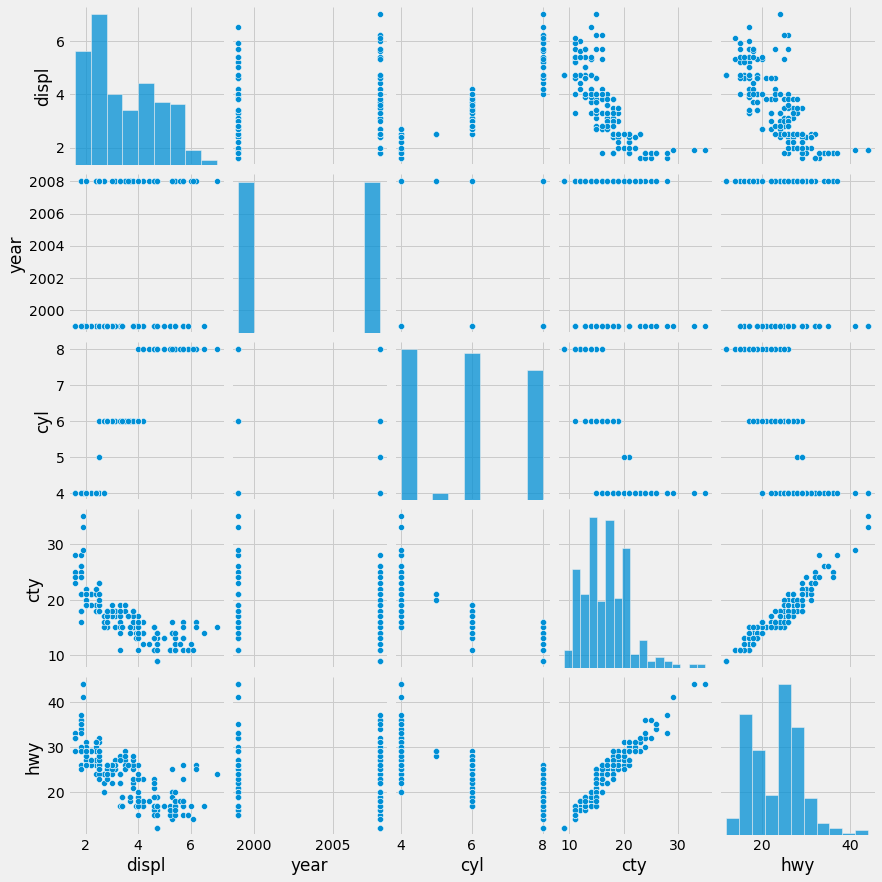

In [6]:
sns.pairplot(mpg);

## Dummify the `drv` Variable

In [7]:
mpg = pd.get_dummies(mpg, columns=['drv'])
mpg

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class,drv_4,drv_f,drv_r
0,audi,a4,1.8,1999,4,auto(l5),18,29,p,compact,0,1,0
1,audi,a4,1.8,1999,4,manual(m5),21,29,p,compact,0,1,0
2,audi,a4,2.0,2008,4,manual(m6),20,31,p,compact,0,1,0
3,audi,a4,2.0,2008,4,auto(av),21,30,p,compact,0,1,0
4,audi,a4,2.8,1999,6,auto(l5),16,26,p,compact,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),19,28,p,midsize,0,1,0
230,volkswagen,passat,2.0,2008,4,manual(m6),21,29,p,midsize,0,1,0
231,volkswagen,passat,2.8,1999,6,auto(l5),16,26,p,midsize,0,1,0
232,volkswagen,passat,2.8,1999,6,manual(m5),18,26,p,midsize,0,1,0


## Split Your Data Into Factors (`X`) and Target (`y`)
You only need to keep the `displ` and `drv` variable(s) here, as those are the only columns you'll be fitting your model on in the next section.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
X= mpg[['displ', 'drv_4', 'drv_f', 'drv_r']]
y= mpg.hwy

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

## Instantiate a Linear Regression Model Object Predicting Highway MPG
Instantiate a `LinearRegression` object here.

In [9]:
lr = LinearRegression() 

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
print(lr.intercept_)
print(lr.coef_)

34.340648523259105
[-2.89284168 -3.43537477  1.53360662  1.90176815]


In [12]:
y_pred = lr.predict(X_test)

#Training MSE
print(metrics.mean_squared_error(y_train, lr.predict(X_train)))

#Testing MSE
print(metrics.mean_squared_error(y_test, y_pred))


#Training RMSE 
print(np.sqrt(metrics.mean_squared_error(y_train, lr.predict(X_train))))
#Testing RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

9.708047054197344
8.47978430082495
3.115773909351791
2.912006919776282


## Evaluate Your Model

- Run five-fold cross-validation on your data.
  - Report the mean of the mean squared error across five folds.
  - Report the mean R-squared value across five folds.

In [13]:
from sklearn import model_selection

In [14]:
from sklearn.model_selection import cross_val_score


# Note the results will vary each run since we take a different
#   subset of the data each time (since shuffle=True)
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=1234)

print('Cross Validated MSE:', np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print('Cross Validated RMSE:', np.sqrt(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print('Cross Validated R-squared:', np.mean(cross_val_score(lr, X, y, cv=kf)))

Cross Validated MSE: 9.588123084816456
Cross Validated RMSE: 3.09646945484958
Cross Validated R-squared: 0.7331085262059374


# Part 2: Classification Using KNN

## Read in the `diamonds` Data
This is data regarding 50,000 round-cut diamonds.

|Factor            |Description                                                                                 |
|------------------|--------------------------------------------------------------------------------------------|
|price             |price in US dollars (326-18,823)                                                            |
|carat             |weight of the diamond (0.2--5.01)                                                           |
|cut               |quality of the cut (Fair, Good, Very Good, Premium, Ideal)                                  |
|color             |diamond colour, from J (worst) to D (best)                                                  |
|clarity           |how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))            |
|x                 |length in mm (0--10.74)                                                                     |
|y                 |width in mm (0--58.9)                                                                       |
|z                 |depth in mm (0--31.8)                                                                       |
|depth             |total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)                          |
|table             |width of top of diamond relative to widest point (43--95)                                   |

In [15]:
dia = pd.read_csv('data/diamonds.csv')

## Explore the Data

In [16]:
print ("Rows     : " ,dia.shape[0])
print ("Columns  : " ,dia.shape[1])
print ("\nFeatures : \n" ,dia.columns.tolist())
print ("\nMissing values :  ",dia.isnull().sum().values.sum())
print ("\nUnique values :  \n",dia.nunique())

print("\nFirst 5 Rows :  \n",dia.head())

print("\nLast 5 Rows :  \n",dia.tail())

Rows     :  53940
Columns  :  10

Features : 
 ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

Missing values :   0

Unique values :  
 carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

First 5 Rows :  
    carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

Last 5 Rows :  
        carat        cut color clarity  depth  table  price     x     y     z
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D   

In [17]:
dia.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [18]:
corr = dia.corr()
corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [19]:
dia.groupby("cut").mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801


In [20]:
dia.groupby('cut').describe()

carat                                                      depth  \
             count      mean       std   min   25%   50%   75%   max    count   
cut                                                                             
Fair        1610.0  1.046137  0.516404  0.22  0.70  1.00  1.20  5.01   1610.0   
Good        4906.0  0.849185  0.454054  0.23  0.50  0.82  1.01  3.01   4906.0   
Ideal      21551.0  0.702837  0.432876  0.20  0.35  0.54  1.01  3.50  21551.0   
Premium    13791.0  0.891955  0.515262  0.20  0.41  0.86  1.20  4.01  13791.0   
Very Good  12082.0  0.806381  0.459435  0.20  0.41  0.71  1.02  4.00  12082.0   

                      ...      y               z                           \
                mean  ...    75%    max    count      mean       std  min   
cut                   ...                                                   
Fair       64.041677  ...  6.640  10.54   1610.0  3.982770  0.651638  0.0   
Good       62.365879  ...  6.440   9.38   4906.0  3.639507  0.654893  0.0   
Ideal      61.709401  ...  6.445  31.80  21551.0  3.401448  0.657648  0.0   
Premium    61.264673  ...  6.760  58.90  13791.0  3.647124  0.731161  0.0   
Very Good  61.818275  ...  6.510   9.94  12082.0  3.559801  0.730228  0.0   

                                    
            25%   50%   75%    max  
cut                                 
Fair       3.61  3.97  4.28   6.98  
Good       3.07  3.70  4.03   5.79  
Ideal      2.80  3.23  3.98   6.03  
Premium    2.94  3.72  4.16   8.06  
Very Good  2.95  3.56  4.02  31.80  

[5 rows x 56 columns]

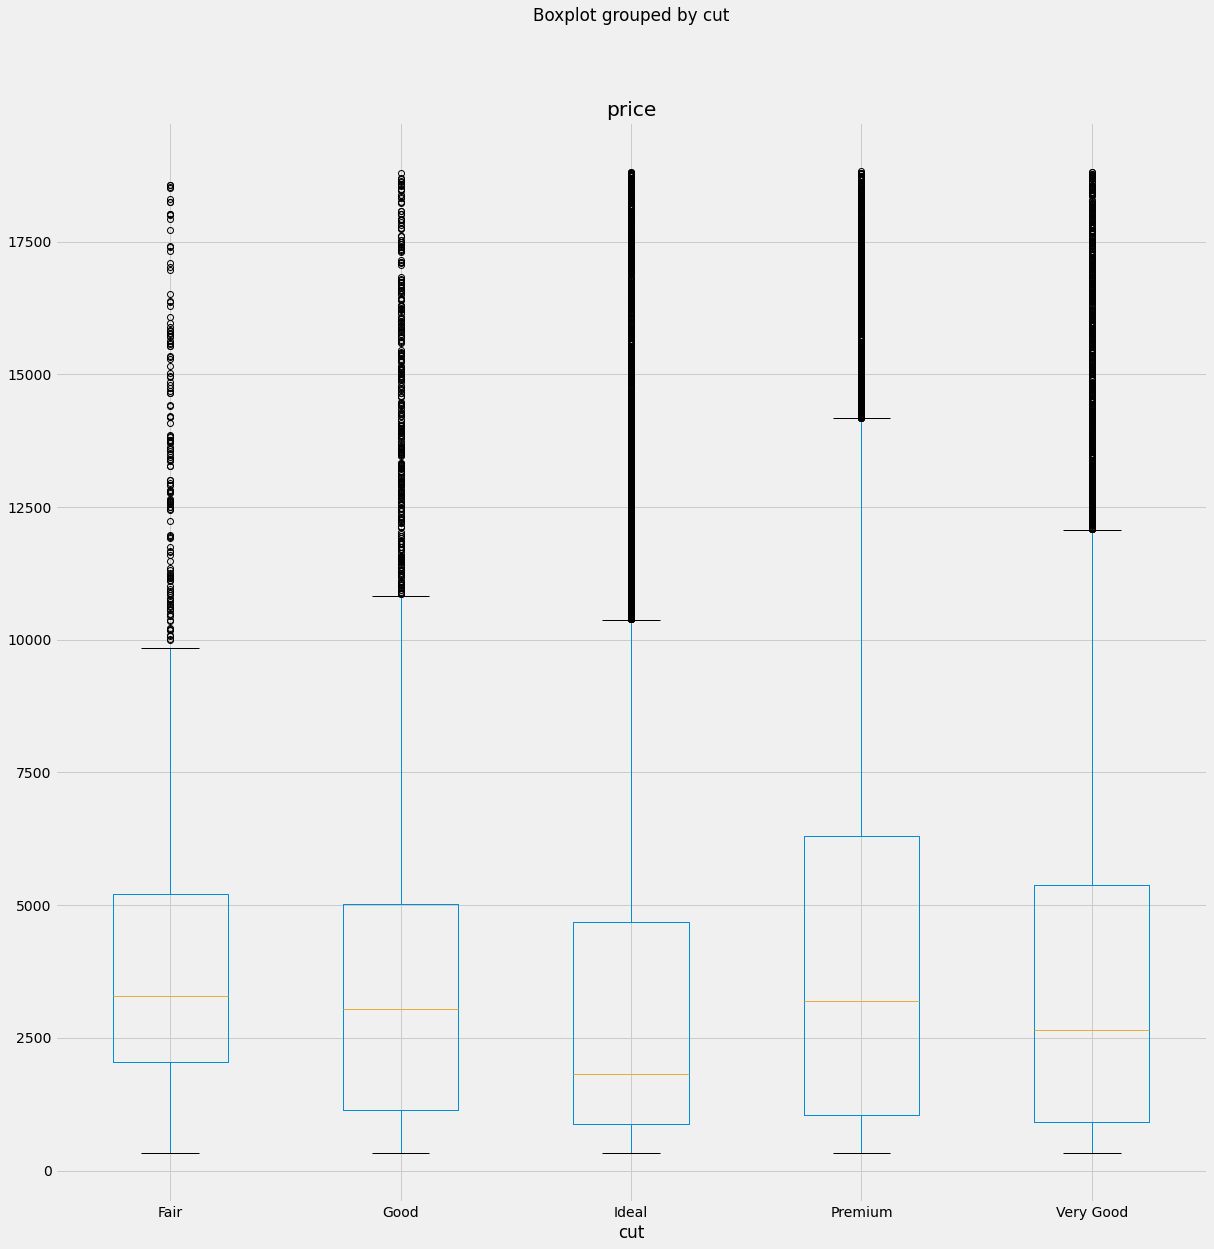

In [21]:
dia.boxplot(column=['price'], by = 'cut', figsize=(20, 20));

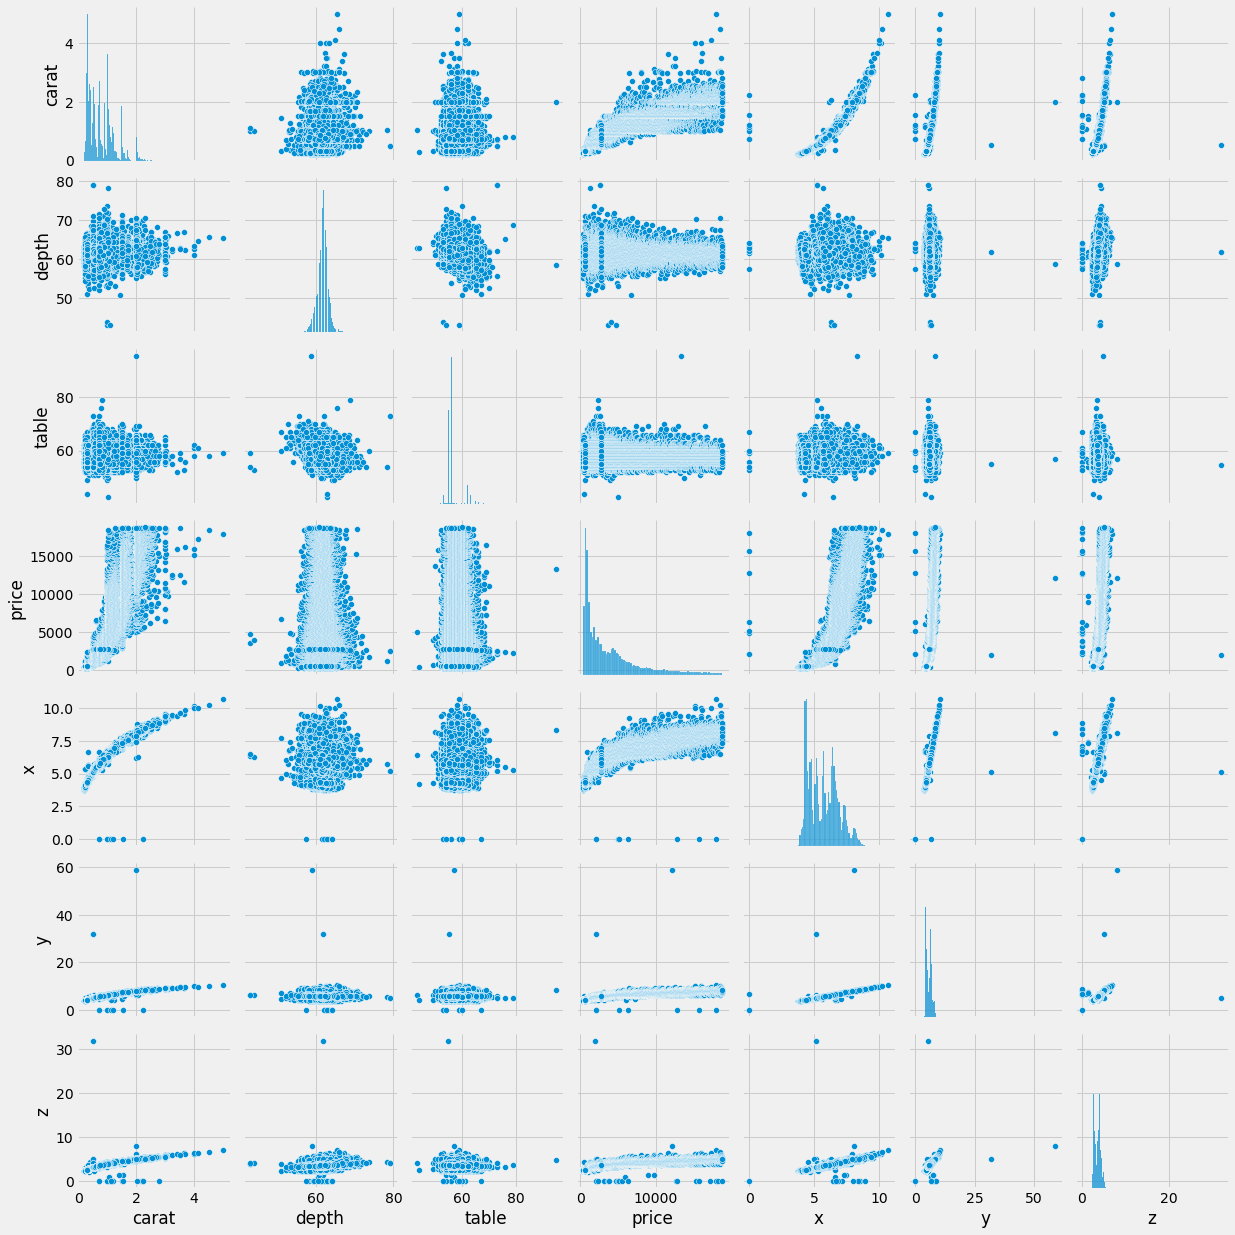

In [22]:
sns.pairplot(dia);

## Filter Your Data
Filter your data to only contain diamonds with `'Ideal'` and `'Good'` cuts.

In [23]:
diaf = dia[(dia['cut'] == 'Ideal') | (dia['cut'] == 'Good')]
diaf


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
...,...,...,...,...,...,...,...,...,...,...
53927,0.79,Good,F,SI1,58.1,59.0,2756,6.06,6.13,3.54
53929,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61


In [24]:
diaf.cut.value_counts()

Ideal    21551
Good      4906
Name: cut, dtype: int64

In [25]:
diam = diaf[(diaf['cut'] == 'Ideal')]
diam.cut.value_counts()

Ideal    21551
Name: cut, dtype: int64

In [26]:
dias = diaf[(diaf['cut']== 'Good')]
dias.cut.value_counts()

Good    4906
Name: cut, dtype: int64

In [27]:
diaf.groupby('cut').describe()

carat                                                      depth  \
         count      mean       std   min   25%   50%   75%   max    count   
cut                                                                         
Good    4906.0  0.849185  0.454054  0.23  0.50  0.82  1.01  3.01   4906.0   
Ideal  21551.0  0.702837  0.432876  0.20  0.35  0.54  1.01  3.50  21551.0   

                  ...      y               z                                 \
            mean  ...    75%    max    count      mean       std  min   25%   
cut               ...                                                         
Good   62.365879  ...  6.440   9.38   4906.0  3.639507  0.654893  0.0  3.07   
Ideal  61.709401  ...  6.445  31.80  21551.0  3.401448  0.657648  0.0  2.80   

                         
        50%   75%   max  
cut                      
Good   3.70  4.03  5.79  
Ideal  3.23  3.98  6.03  

[2 rows x 56 columns]

In [28]:
diaf.groupby('cut').mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448


## Downsample the Majority Class

In [29]:
from sklearn.utils import resample
diafm= resample(diam, replace = False, n_samples = 4906, random_state =1234)

In [30]:
diafm.cut.value_counts()

Ideal    4906
Name: cut, dtype: int64

In [31]:
dia_down = pd.concat([diafm, dias])
dia_down.cut.value_counts()

Ideal    4906
Good     4906
Name: cut, dtype: int64

In [32]:
dia_down.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.003001,0.229390,0.922144,0.974951,0.944230,0.966301
depth,0.003001,1.000000,-0.315493,-0.014931,-0.066217,-0.066351,0.078527
table,0.229390,-0.315493,1.000000,0.144362,0.254065,0.243908,0.203971
price,0.922144,-0.014931,0.144362,1.000000,0.881076,0.855491,0.872197
x,0.974951,-0.066217,0.254065,0.881076,1.000000,0.968300,0.982074
y,0.944230,-0.066351,0.243908,0.855491,0.968300,1.000000,0.959299
z,0.966301,0.078527,0.203971,0.872197,0.982074,0.959299,1.000000


In [33]:
dia_down.groupby('cut').describe()

carat                                                       depth  \
        count      mean       std   min     25%   50%   75%   max   count   
cut                                                                         
Good   4906.0  0.849185  0.454054  0.23  0.5000  0.82  1.01  3.01  4906.0   
Ideal  4906.0  0.707201  0.432424  0.23  0.3525  0.54  1.01  2.63  4906.0   

                  ...     y              z                                  \
            mean  ...   75%    max   count      mean       std   min   25%   
cut               ...                                                        
Good   62.365879  ...  6.44   9.38  4906.0  3.639507  0.654893  0.00  3.07   
Ideal  61.713045  ...  6.45  31.80  4906.0  3.411178  0.654874  2.41  2.81   

                         
        50%   75%   max  
cut                      
Good   3.70  4.03  5.79  
Ideal  3.24  3.98  5.50  

[2 rows x 56 columns]

In [34]:
dia_down.groupby('cut').mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.707201,61.713045,55.949552,3475.730330,5.520577,5.537530,3.411178


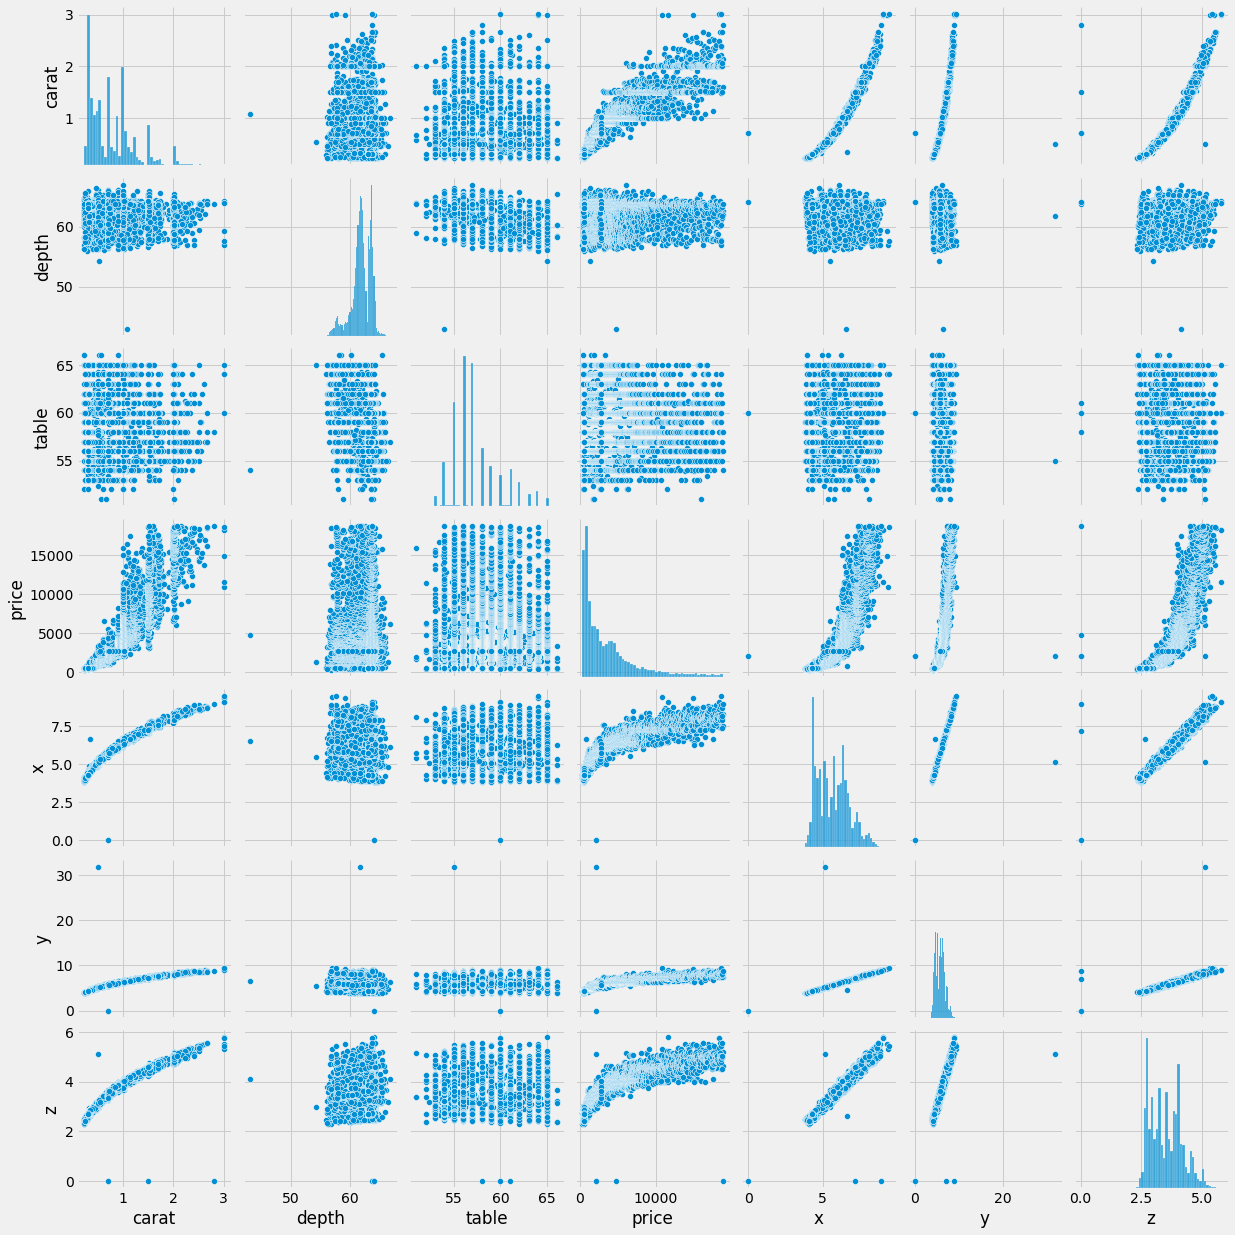

In [35]:
sns.pairplot(dia_down);

## Prepare Your `X`, `y` Matrices
Construct an `X` matrix using **all numeric columns** from the `diamonds` data.

You will be predicting `cut`. Construct a `y` vector in a numeric format that can be used by scikit-learn.

In [36]:
dia_down['cut_num'] = dia_down.cut.map({'Ideal':0,
                                        'Good':1})
#1 equals Good 0 equal Ideal

In [37]:
dia_down.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num
3142,0.70,Ideal,E,SI1,61.6,56.0,3330,5.70,5.72,3.52,0
16620,1.09,Ideal,H,VS1,61.3,54.0,6643,6.66,6.68,4.09,0
36245,0.41,Ideal,E,VS2,61.8,57.0,935,4.76,4.78,2.95,0
19952,1.53,Ideal,H,SI2,61.9,57.0,8499,7.42,7.34,4.57,0
10423,1.01,Ideal,G,SI2,61.5,57.0,4783,6.43,6.45,3.96,0
31861,0.30,Ideal,H,VVS2,61.5,56.0,776,4.35,4.33,2.67,0
11714,0.34,Ideal,G,VS2,62.0,55.0,596,4.46,4.48,2.77,0
32114,0.43,Ideal,H,SI1,61.9,55.0,783,4.84,4.88,3.01,0
18620,1.01,Ideal,G,VVS2,62.0,58.0,7597,6.36,6.39,3.95,0
3634,0.71,Ideal,G,VS1,60.7,57.0,3431,5.76,5.80,3.51,0


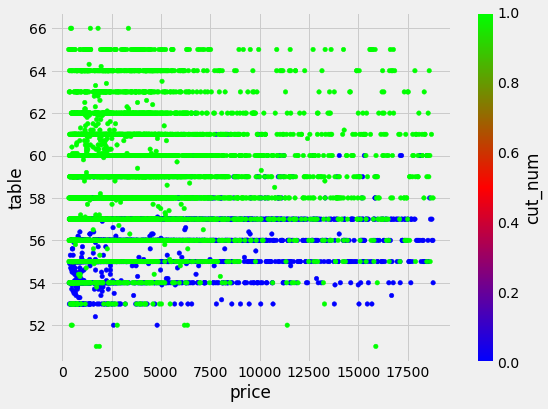

In [38]:
dia_down.plot(kind='scatter', x='price', y='table', c='cut_num', colormap='brg');

In [39]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
X= dia_down[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
y= dia_down.cut_num





## Split Into Testing and Training Groups

Now that we've downsampled/balanced our classes, as well as removed unused factors, we're ready to split into testing and training groups. We're doing this avoid _leaking information into our testing set_. 

- First, we'll perform cross-validation on our _training_ set, finding an optimal value for $k$. 
- After this, we'll take that value of $k$ and use it to fit our model to the _training_ set, creating our tuned model.
- Finally, we will take this same model and use it to _predict_ and _score_ against our _testing_ set.
- Note that our model at this point will have never seen nor trained against the _testing_ set.

In the future, we can (and should!) automate this process using a [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) — a tool used to abstract our modeling process, allowing data to be processed without manual intervention.

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)

y_pred_class = knn.predict(X)

In [41]:
#Baseline X, y KNN before scaling
knn.score(X, y)

0.8455972278842234

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

In [43]:
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

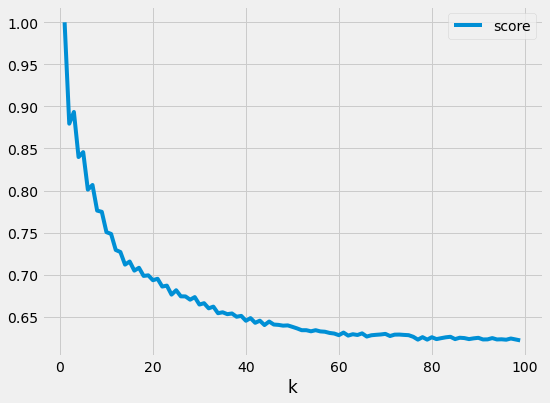

In [44]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [45]:
#X_train, y_train before Scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
knn.score(X_train, y_train)

0.8217149069167007

In [47]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.7117814920505503


## Scale Your `X` Matrix Using a StandardScaler

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred_class = knn.predict(X)

In [50]:
knn.score(X, y)

0.8455972278842234

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
knn.score(X_train, y_train)

0.9733659464601169

In [53]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

#scaling improved test Score to .95!

0.9669792091316755


## Why Did We Just Do That?
In the cell below, provide a 2–3 sentence explanation of why scaling our $X$ matrix was necessary here. What could have gone wrong if we didn't?

Scaling for KNN is important because KNN uses the distance between two points. If two features are on different scales, the distances between them on each coordinate might be given falsely disproportionate weights. If we didn't scale, it's possible that KNN would make all of its decisions based on the feature with the widest scale.

Answer: It improves the score it allows for a mean of 0 and std of 1 and its part of normalization of the data. It allows for the scales also to be the same

## K-Nearest Neighbors
You're going to fit a KNN model here, but you first need to tune your model to find the best value of $k$. Loop through values of $k$ you think are appropriate (Hint: Look for "elbows" in your result curves) and select the value that produces the best model with respect to **five-fold cross-validation**.

**Important**: Do not use _any_ code copied and pasted directly from the lecture! Typing things out yourself is 100% essential to the learning process. It's OK to use the exact same strategies as we did in class, but be sure to enter them manually.

In [54]:
k_range = list(range(1, 101))
training_error = []
testing_error = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [55]:
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error, 'testing accuracy':testing_accuracy, 'training accuracy':training_accuracy}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
print(df.sort_values('testing error').head(10))

    training error  testing error  testing accuracy  training accuracy
K                                                                     
14             0.5       0.029352          0.968202           0.428353
27             0.5       0.029759          0.968202           0.428353
29             0.5       0.030167          0.968202           0.428353
28             0.5       0.030167          0.968202           0.428353
25             0.5       0.030167          0.968202           0.428353
31             0.5       0.030575          0.968202           0.428353
13             0.5       0.030575          0.968202           0.428353
34             0.5       0.030982          0.968202           0.428353
47             0.5       0.030982          0.968202           0.428353
33             0.5       0.030982          0.968202           0.428353


## Produce the Plot of Tuning Parameter ($k$) vs. Accuracy
What is the "best" value of k?

Answer: k=14

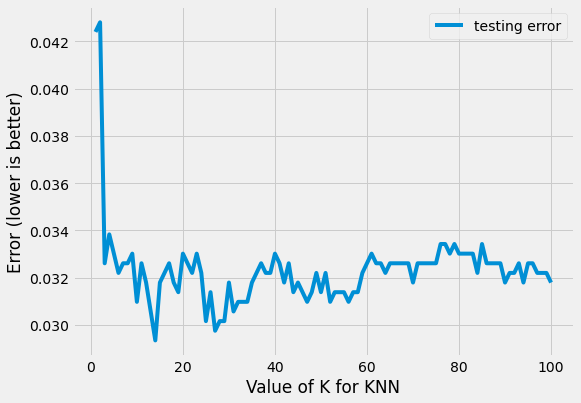

In [56]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

## Produce the Best KNN Model
Now that you know the optimal value of $k$, fit a KNN on the training set (this training set should still filtered to `'Ideal'` and `'Good'` cuts).

In [57]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X)

In [58]:
knn.score(X_train, y_train)

0.9658921049055578

## Does This Model Outperform the Baseline?

YES

## Prediction
Suppose I have a diamond with the following specifications:

In [59]:
new_diamond = pd.DataFrame({
    'carat': 0.24,
    'depth': 60.,
    'table': 64.,
    'price': 400.,
    'x': 3.,
    'y': 3.,
    'z': 3.
}, index=[0])

In [60]:
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X, y)

#knn.predict(np.array([[.24, 60, 64, 400, 3, 3, 3]]))
pred = knn.predict(new_diamond)
pred

array([1], dtype=int64)

What do you predict to be the cut of this diamond?

**Big hint:** Don't forget to scale this new data point appropriately!

Answer: Good

# Part 3: Now _YOU_ Model!
Put your skills to the test.

Using the _full_ `diamonds` data set, produce a **logistic regression** model that achieves the best five-fold cross-validation. Note that, for this problem, you're performing multi-class classification. The response variable has _five_ categories.

In [61]:
dia = pd.read_csv('data/diamonds.csv')

In [62]:
print ("Rows     : " ,dia.shape[0])
print ("Columns  : " ,dia.shape[1])
print ("\nFeatures : \n" ,dia.columns.tolist())
print ("\nMissing values :  ",dia.isnull().sum().values.sum())
print ("\nUnique values :  \n",dia.nunique())

print("\nFirst 5 Rows :  \n",dia.head())

print("\nLast 5 Rows :  \n",dia.tail())

Rows     :  53940
Columns  :  10

Features : 
 ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

Missing values :   0

Unique values :  
 carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

First 5 Rows :  
    carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

Last 5 Rows :  
        carat        cut color clarity  depth  table  price     x     y     z
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D   

In [63]:
dia.groupby('cut').describe()

carat                                                      depth  \
             count      mean       std   min   25%   50%   75%   max    count   
cut                                                                             
Fair        1610.0  1.046137  0.516404  0.22  0.70  1.00  1.20  5.01   1610.0   
Good        4906.0  0.849185  0.454054  0.23  0.50  0.82  1.01  3.01   4906.0   
Ideal      21551.0  0.702837  0.432876  0.20  0.35  0.54  1.01  3.50  21551.0   
Premium    13791.0  0.891955  0.515262  0.20  0.41  0.86  1.20  4.01  13791.0   
Very Good  12082.0  0.806381  0.459435  0.20  0.41  0.71  1.02  4.00  12082.0   

                      ...      y               z                           \
                mean  ...    75%    max    count      mean       std  min   
cut                   ...                                                   
Fair       64.041677  ...  6.640  10.54   1610.0  3.982770  0.651638  0.0   
Good       62.365879  ...  6.440   9.38   4906.0  3.639507  0.654893  0.0   
Ideal      61.709401  ...  6.445  31.80  21551.0  3.401448  0.657648  0.0   
Premium    61.264673  ...  6.760  58.90  13791.0  3.647124  0.731161  0.0   
Very Good  61.818275  ...  6.510   9.94  12082.0  3.559801  0.730228  0.0   

                                    
            25%   50%   75%    max  
cut                                 
Fair       3.61  3.97  4.28   6.98  
Good       3.07  3.70  4.03   5.79  
Ideal      2.80  3.23  3.98   6.03  
Premium    2.94  3.72  4.16   8.06  
Very Good  2.95  3.56  4.02  31.80  

[5 rows x 56 columns]

In [64]:
dia['cut_num'] = dia.cut.map({'Fair': 1, 'Good':2, 'Ideal':3, "Very Good": 4, "Premium": 5})
#1 equals Good 0 equal Ideal
dia

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,5


In [65]:
dia.describe()

,carat,depth,table,price,x,y,z,cut_num
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,3.584687
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.056025
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,5.000000


In [66]:
dia.shape


(53940, 11)

In [67]:
dia.groupby('cut_num').head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,4
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,4
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,4
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,4


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
X= dia[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
y= dia.cut_num




In [69]:
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter = 2000).fit(X, y)
log_pred_class = logreg.predict(X)
metrics.accuracy_score(y, log_pred_class)

0.5451242120875046

In [70]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=5432)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 

In [71]:
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter = 2000).fit(X_train, y_train)



In [72]:
log_pred_class = logreg.predict(X_test)
metrics.accuracy_score(y_test, log_pred_class)

0.6565813867259919

In [73]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=5432)
print('Cross Validated MSE:', np.mean(-cross_val_score(logreg, X, y, cv=kf, scoring='neg_mean_squared_error')))
print('Cross Validated RMSE:', np.sqrt(np.mean(-cross_val_score(logreg, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print('Cross Validated R-squared:', np.mean(cross_val_score(logreg, X, y, cv=kf)))

C:\Users\hwk70\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross Validated MSE: 1.261086392287727


C:\Users\hwk70\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross Validated RMSE: 1.1229810293534468


C:\Users\hwk70\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross Validated R-squared: 0.5452169076751947


In [74]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=5432)
print('Cross Validated MSE:', np.mean(-cross_val_score(logreg, X_test, y_test, cv=kf, scoring='neg_mean_squared_error')))
print('Cross Validated RMSE:', np.sqrt(np.mean(-cross_val_score(logreg, X_test, y_test, cv=kf, scoring='neg_mean_squared_error'))))
print('Cross Validated R-squared:', np.mean(cross_val_score(logreg, X_test, y_test, cv=kf)))

Cross Validated MSE: 0.9725621060437524
Cross Validated RMSE: 0.9861856346772409
Cross Validated R-squared: 0.6553948832035595
